In [16]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
%matplotlib inline

In [88]:
n = 5
state = 'balanced'

In [89]:
def oracle(n,state):
    qc_oracle = QuantumCircuit(n+1)
    
    if state == 'constant':
        num = np.random.randint(2)
        if num == 1:
            qc_oracle.x(n)
    
    if state == 'balanced':
        for i in range(n):
            qc_oracle.cx(i,n)
    oracle_gate = qc_oracle.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [90]:
qc = QuantumCircuit(n+1,n)

qc.x(n)
qc.h(n)

In [91]:
for i in range(n):
    qc.h(i)
    
dj_oracle = oracle(n,state)
qc.append(dj_oracle,range(n+1))

for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i,i)

In [92]:
qc.draw()

┌───┐     ┌─────────┐┌───┐┌─┐            
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├────────────
     ├───┤     │         │├───┤└╥┘┌─┐         
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├─────────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├──────
     ├───┤     │  Oracle │├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├─────┤4        ├┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├┤5        ├──────╫──╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║  ║ 
c: 5/═══════════════════════════╩══╩══╩══╩══╩═
                                0  1  2  3  4

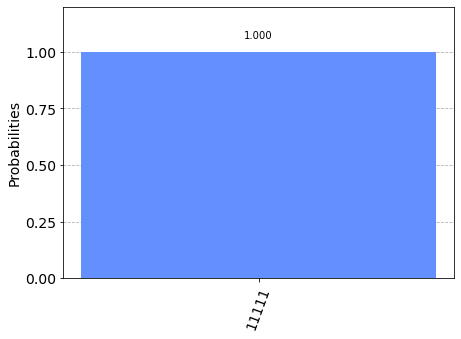

In [93]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc,backend=backend,shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)